# **Task 1**

Data Exploration and Preprocessing: Explore the distribution of tweets by sentiment, Age of User, Country, and Time of Tweet. Visualize the data using appropriate charts such as bar charts, histograms, and heatmaps.

In [1]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")

print("Path to dataset files:", path)

In [ ]:
# Read the training data
trainData = pd.read_csv('train.csv', encoding='ISO-8859-1') # file encoding is not UTF-8, which is the pandas default encoding when reading csv, so we had specified the encoding
print(trainData.head())

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0    

**Distribution of tweets by sentiment:**

In [ ]:
sentimentCounts = trainData['sentiment'].value_counts()
print(sentimentCounts)

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64


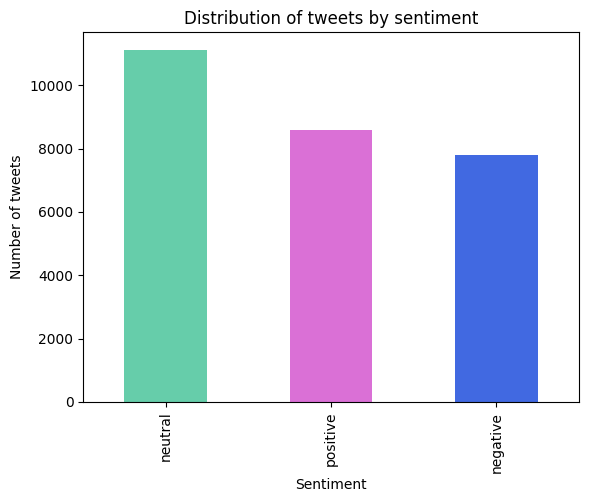

In [ ]:
sentimentCounts.plot(kind='bar', color=['mediumaquamarine', 'orchid', 'royalblue']) # bar chart plot

plt.title('Distribution of tweets by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

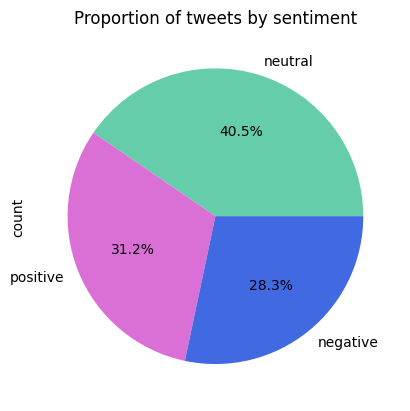

In [ ]:
sentimentCounts.plot(kind='pie', autopct='%1.1f%%', colors=['mediumaquamarine', 'orchid', 'royalblue']) # pie chart plot
plt.title('Proportion of tweets by sentiment')
plt.show()

**Age of the user:**

In [ ]:
ageUser = trainData['Age of User'].value_counts()
print(ageUser)

Age of User
0-20      4581
21-30     4580
31-45     4580
46-60     4580
60-70     4580
70-100    4580
Name: count, dtype: int64


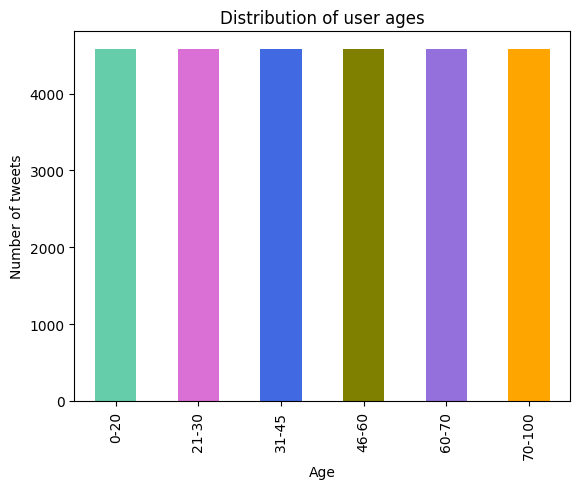

In [ ]:
ageUser.plot(kind='bar', color=['mediumaquamarine', 'orchid', 'royalblue', 'olive', 'mediumpurple', 'orange']) # bar chart plot

plt.title('Distribution of user ages')
plt.xlabel('Age')
plt.ylabel('Number of tweets')
plt.show()

**Country:**

In [ ]:
countryCounts = trainData['Country'].value_counts()
print(countryCounts)

Country
Afghanistan                 149
Czechia (Czech Republic)    149
Egypt                       149
Ecuador                     149
Dominica                    149
                           ... 
Seychelles                  127
Sierra Leone                127
Singapore                   127
Slovakia                    127
Zimbabwe                    127
Name: count, Length: 195, dtype: int64


It can be observed that there are tweets from 195 different countries, that's why in the plot we are going to print only the top 10 countries with more counts.

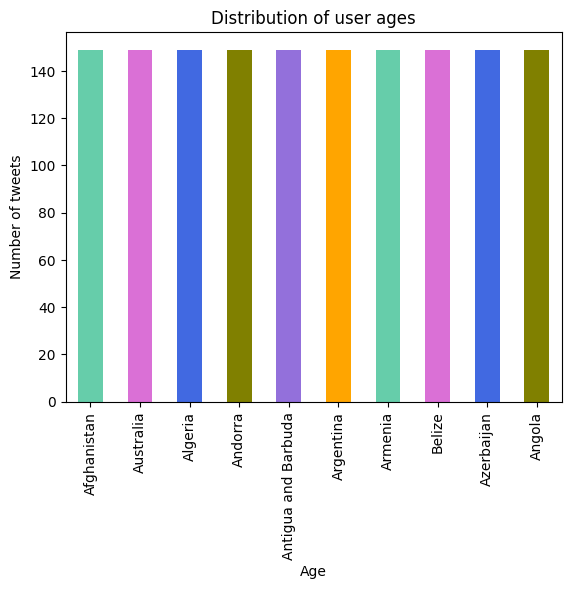

In [ ]:
top_10_countries = countryCounts.sort_values(ascending=False).head(10)
top_10_countries.plot(kind='bar', color=['mediumaquamarine', 'orchid', 'royalblue', 'olive', 'mediumpurple', 'orange']) # bar chart plot

plt.title('Distribution of user ages')
plt.xlabel('Age')
plt.ylabel('Number of tweets')
plt.show()
# As it can be appreciated, Czechia and other countries which are tie-up with Afghanistan since Pandas is probably returning the first 10 entries based on the order in which they appear in the dataset.

**Time of Tweet:**

In [ ]:
tweet_times = trainData['Time of Tweet'].value_counts()
tweet_times

,count
Time of Tweet,
morning,9161
noon,9160
night,9160


# **Task 2**

Analyze the correlation between demographic information (e.g., Age of User, Country) and the sentiment of the tweets. Identify if certain age groups or countries tend to express more positive, negative, or neutral sentiments. Also. analyze how density affects sentiment patterns.

In [ ]:
from scipy.stats import chi2_contingency

def chi2_square(feature):
    contingency_table = pd.crosstab(trainData[feature], trainData['sentiment'])
    print("Contingency Table:")
    print(contingency_table)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("\nChi-Square Test Results:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}")

    # Interpretation
    alpha = 0.05  # significance level
    if p < alpha:
        print(f"Reject the null hypothesis: There is a significant association between {feature} and sentiment.")
    else:
        print(f"Fail to reject the null hypothesis: No significant association between {feature} and sentiment.")


**Time of the tweets**

In [ ]:
sentiment_time = trainData.groupby(['Time of Tweet', 'sentiment']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_time.div(sentiment_time.sum(axis=1), axis=0) * 100
sentiment_percentages

sentiment,negative,neutral,positive
Time of Tweet,,,
morning,27.955463,41.076302,30.968235
night,28.580786,40.174672,31.244541
noon,28.406114,40.120087,31.473799


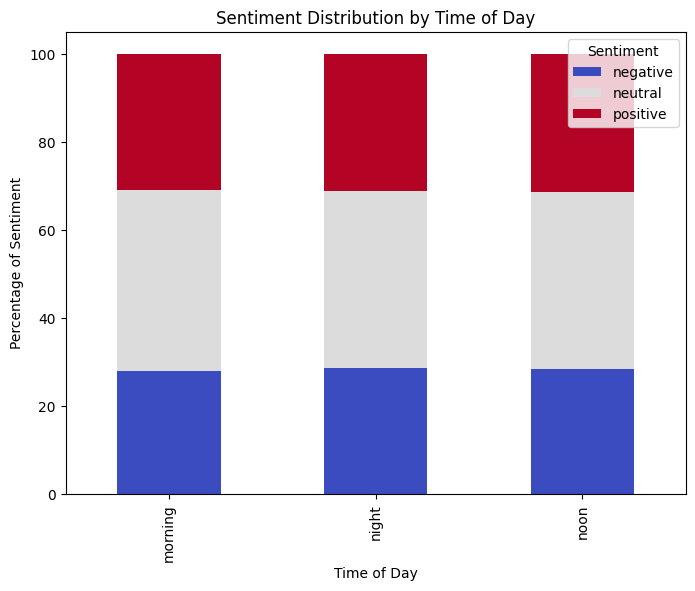

In [ ]:
sentiment_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')
plt.title('Sentiment Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Sentiment')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
chi2_square('Time of Tweet')

Contingency Table:
sentiment      negative  neutral  positive
Time of Tweet                             
morning            2561     3763      2837
night              2618     3680      2862
noon               2602     3675      2883

Chi-Square Test Results:
Chi2 Statistic: 2.3555249031764487
P-value: 0.6706790983811866
Degrees of Freedom: 4
Expected Frequencies:
[[2593.85542739 3706.26971362 2860.87485899]
 [2593.57228631 3705.86514319 2860.5625705 ]
 [2593.57228631 3705.86514319 2860.5625705 ]]
Fail to reject the null hypothesis: No significant association between Time of Tweet and sentiment.


**Age of users**

In [ ]:
sentiment_age = trainData.groupby(['Age of User', 'sentiment']).size().unstack(fill_value=0)
age_corr = sentiment_age.div(sentiment_age.sum(axis=1), axis=0) * 100
age_corr

sentiment,negative,neutral,positive
Age of User,,,
0-20,28.159790,41.432002,30.408208
21-30,29.170306,39.956332,30.873362
31-45,28.711790,39.606987,31.681223
46-60,27.751092,40.720524,31.528384
60-70,27.641921,40.283843,32.074236
70-100,28.449782,40.742358,30.807860


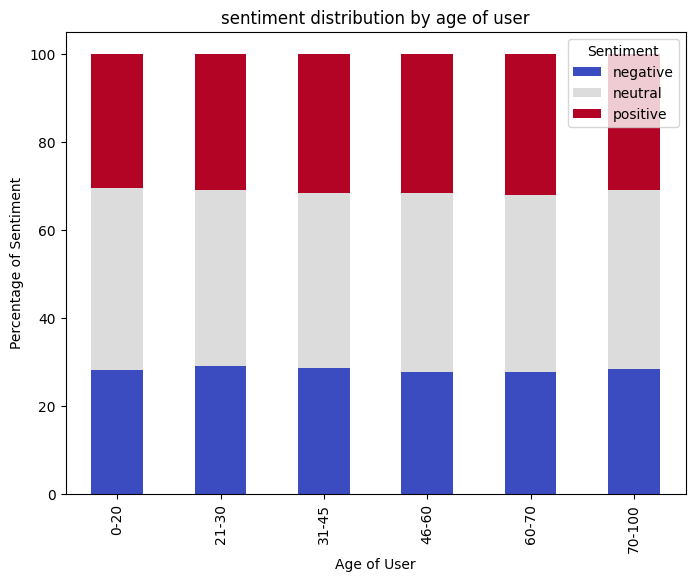

In [ ]:
age_corr.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')
plt.title('sentiment distribution by age of user')
plt.xlabel('Age of User')
plt.ylabel('Percentage of Sentiment')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
chi2_square('Age of User')

Contingency Table:
sentiment    negative  neutral  positive
Age of User                             
0-20             1290     1898      1393
21-30            1336     1830      1414
31-45            1315     1814      1451
46-60            1271     1865      1444
60-70            1266     1845      1469
70-100           1303     1866      1411

Chi-Square Test Results:
Chi2 Statistic: 8.049420608335641
P-value: 0.6240094842021193
Degrees of Freedom: 10
Expected Frequencies:
[[1297.06928423 1853.33714203 1430.59357374]
 [1296.78614315 1852.93257159 1430.28128525]
 [1296.78614315 1852.93257159 1430.28128525]
 [1296.78614315 1852.93257159 1430.28128525]
 [1296.78614315 1852.93257159 1430.28128525]
 [1296.78614315 1852.93257159 1430.28128525]]
Fail to reject the null hypothesis: No significant association between Age of User and sentiment.


# **Works done by Sania for task 2**

sentiment        negative  neutral  positive
Land Area (Km²)                             
0.0                    48       54        46
1.0                    44       63        41
20.0                   44       60        44
30.0                   42       44        41
60.0                   34       59        34
...                   ...      ...       ...
8358140.0              43       61        45
9093510.0              37       62        50
9147420.0              35       57        35
9388211.0              41       59        49
16376870.0             37       52        38

[193 rows x 3 columns]
sentiment  negative   neutral  positive
sentiment                              
negative   1.000000  0.210228  0.204344
neutral    0.210228  1.000000  0.278750
positive   0.204344  0.278750  1.000000


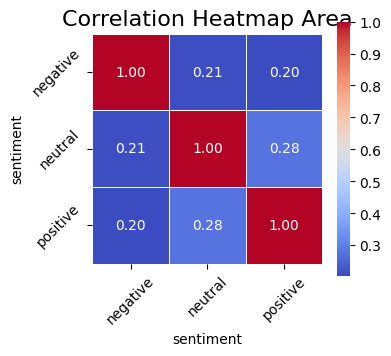

In [ ]:
import seaborn as sns

age_of_tweets = df_train.groupby('Land Area (Km²)')['sentiment'].value_counts(ascending=True)
at = age_of_tweets.groupby(['Land Area (Km²)', 'sentiment']).sum().unstack()
print(at)
sent_age_corr=at.corr(method='pearson')
print(sent_age_corr)

plt.figure(figsize=(4, 4))
sns.heatmap(sent_age_corr, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap Area', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

sentiment        negative  neutral  positive
Density (P/Km²)                             
2                      41       49        58
3                     123      182       139
4                     182      302       237
5                      33       63        52
7                      52       61        35
...                   ...      ...       ...
1802                   38       60        50
2003                   48       54        46
2239                   42       59        48
8358                   43       50        34
26337                  44       63        41

[136 rows x 3 columns]
sentiment  negative   neutral  positive
sentiment                              
negative   1.000000  0.960464  0.957975
neutral    0.960464  1.000000  0.972990
positive   0.957975  0.972990  1.000000


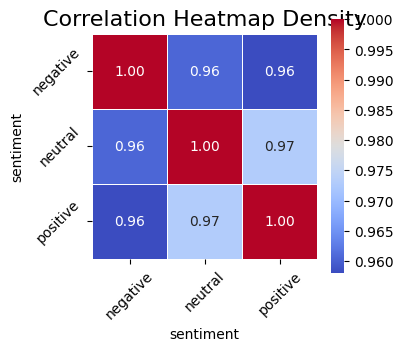

In [ ]:
import seaborn as sns

den_of_tweets = df_train.groupby('Density (P/Km²)')['sentiment'].value_counts(ascending=True)
dt = den_of_tweets.groupby(['Density (P/Km²)', 'sentiment']).sum().unstack()
print(dt)
sent_den_corr=dt.corr(method='pearson')
print(sent_den_corr)

plt.figure(figsize=(4, 4))
sns.heatmap(sent_den_corr, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap Density', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
cleaned_df=pd.read_csv("finalDatasetTest.csv")

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(cleaned_df['tokens'].str.split())
corpus = [dictionary.doc2bow(text.split()) for text in cleaned_df['tokens']]

# Set number of topics
num_topics = 5
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

for t in range(num_topics):
    plt.figure(figsize=(5, 4))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(dict(lda_model.show_topic(t, topn=10)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {t+1}')
    plt.show()



(0, '0.007*"\'work\'," + 0.007*"\'day\'," + 0.005*"\'still\'," + 0.005*"\'laughing\'," + 0.005*"\'today\',"')
(1, '0.008*"\'get\'," + 0.008*"\'good\'," + 0.006*"\'like\'," + 0.005*"\'would\'," + 0.005*"\'much\',"')
(2, '0.011*"\'see\'," + 0.009*"\'day\'," + 0.008*"\'get\'," + 0.006*"\'laughing\'," + 0.005*"\'last\',"')
(3, '0.006*"\'know\'," + 0.005*"\'got\'," + 0.005*"\'good\'," + 0.005*"\'want\'," + 0.005*"\'going\',"')
(4, '0.007*"\'love\'," + 0.007*"\'day\'," + 0.006*"\'tear\'," + 0.006*"\'like\'," + 0.005*"\'eye\',"')



KeyboardInterrupt



<Figure size 500x400 with 0 Axes>

In [ ]:
def get_topic(text):
    bow = dictionary.doc2bow(text.split())
    topic_distribution = lda_model.get_document_topics(bow)
    return max(topic_distribution, key=lambda x: x[1])[0]  # Get the topic with the highest probability

cleaned_df['topic'] = cleaned_df['tokens'].apply(get_topic)


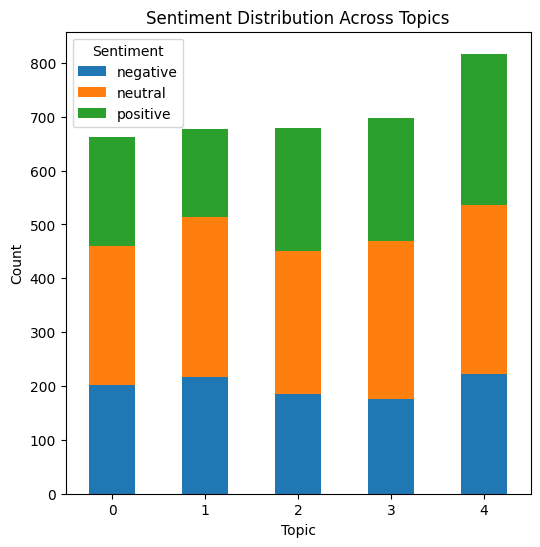

In [ ]:
sentiment_distribution = cleaned_df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(6, 6))
plt.title('Sentiment Distribution Across Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=0)
plt.show()


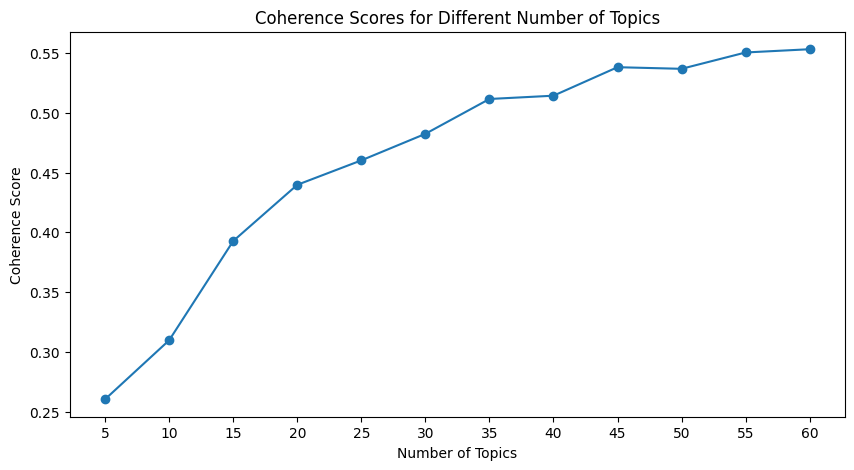

The optimal number of topics is 60 with a coherence score of 0.5531022615668497.


In [ ]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel


cleaned_df_na = cleaned_df[['cleaned_text']].dropna()
tokenized_texts = cleaned_df_na['cleaned_text'].str.split()

dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

limit = 61  # Maximum number of topics
start = 5   # Minimum number of topics
step = 5    # Step size

model_list, coherence_values = compute_coherence_values(dictionary, corpus, tokenized_texts, limit, start, step)

# Step 5: Plot the coherence scores
x = range(start, limit, step)
plt.figure(figsize=(10, 5))
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Number of Topics")
plt.xticks(x)
plt.show()

# Find the optimal number of topics
optimal_index = coherence_values.index(max(coherence_values))
optimal_topics = start + optimal_index * step
print(f"The optimal number of topics is {optimal_topics} with a coherence score of {max(coherence_values)}.")

In [ ]:
print(cleaned_df.columns)


Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)',
       'cleaned_text', 'tokens', 'topic'],
      dtype='object')


In [ ]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

model = SentenceTransformer('bert-base-nli-mean-tokens')  # You can choose a different model
embeddings = model.encode(cleaned_df['text'].tolist(), show_progress_bar=True)
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(cleaned_df['text'].tolist(), embeddings)

topic_info = topic_model.get_topic_info()
print(topic_info)

Batches:   0%|          | 0/111 [00:00<?, ?it/s]

    Topic  Count                                        Name  \
0      -1   1834                            -1_the_to_my_you   
1       0    192                     0_hours_weekend_to_have   
2       1    177                1_lunch_breakfast_dinner_and   
3       2     95                         2_no_dont_didnt_not   
4       3     90                          3_shake_too_me_yes   
5       4     87                    4_sorry_sucks_that_hurts   
6       5     82                      5_bed_sleep_night_home   
7       6     72                6_twitter_on_iphone_facebook   
8       7     50                      7_clean_mom_my_mothers   
9       8     49                      8_sad_bad_im_miserable   
10      9     49                          9_fans_you_love_he   
11     10     42                   10_tonight_night_fun_good   
12     11     35                        11_no_didnt_wont_one   
13     12     31                         12_hate_im_sick_him   
14     13     31                     13_

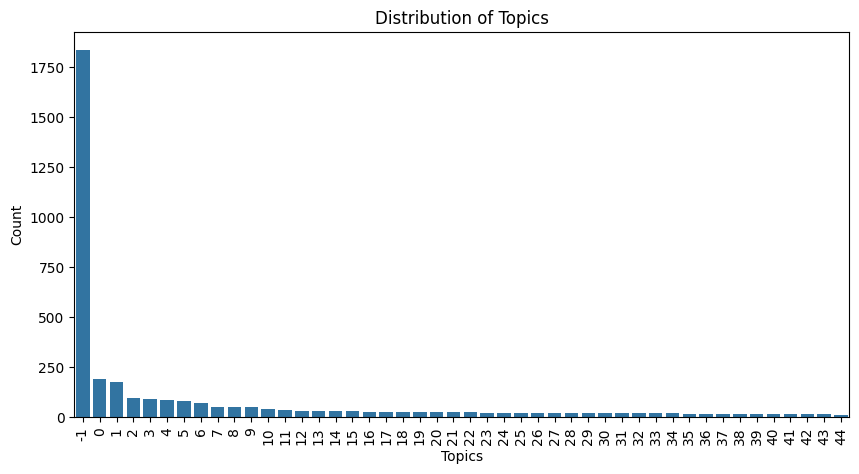

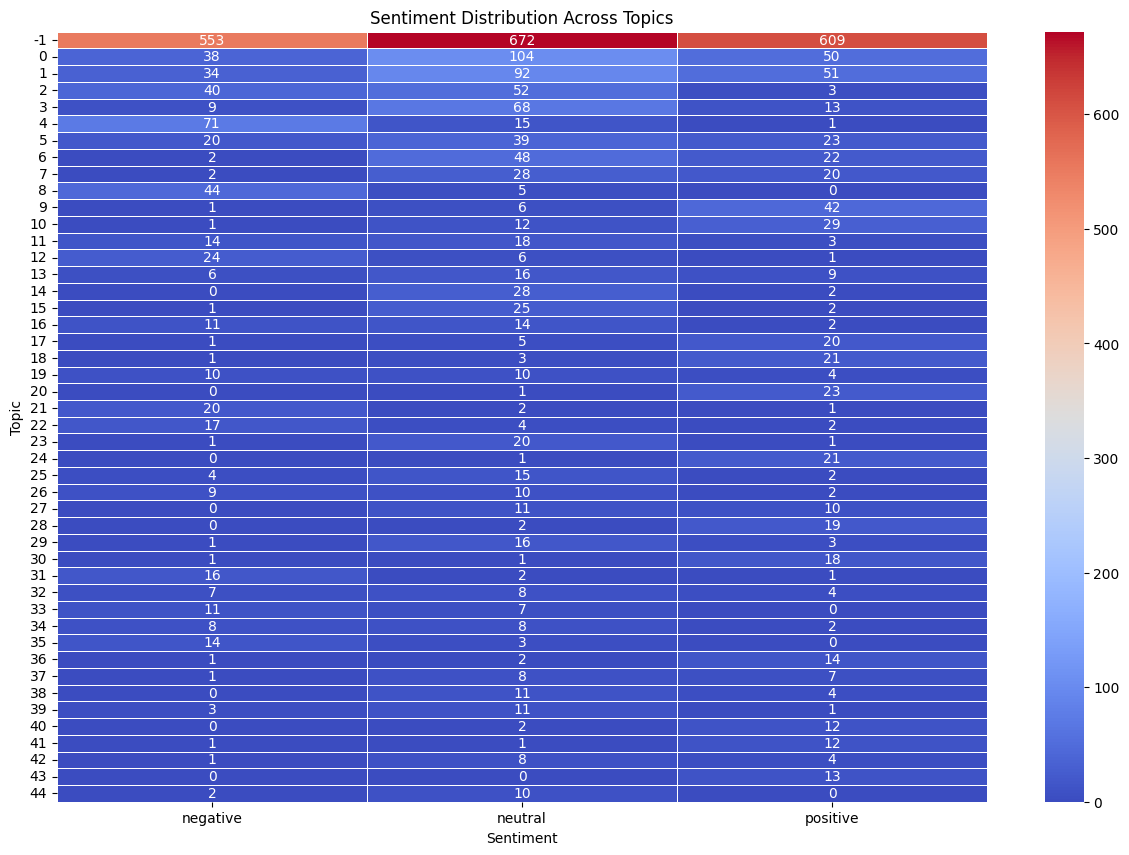

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Topic', y='Count', data=topic_info, ax=ax)
plt.title("Distribution of Topics")
plt.xlabel("Topics")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Step 5: Analyze sentiment for each topic
cleaned_df['topic'] = topics
sentiment_counts = cleaned_df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)

# Visualize sentiment distribution across topics
plt.figure(figsize=(15, 10))
sns.heatmap(sentiment_counts, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title("Sentiment Distribution Across Topics")
plt.xlabel("Sentiment")
plt.ylabel("Topic")
plt.show()

# **Task 3**

Investigate how the time of tweet (morning, noon, night) correlates with sentiment. Do people tend to tweet more positively or negatively at certain times of the day? Visualize sentiment trends over time to identify any patterns (e.g., higher negativity during late hours or weekends)

We basically repeat the things we have done in task 2. `Time of Tweet` is consisted of three class; `morning`, `noon`, and `night`.

In [ ]:
sentiment_time = trainData.groupby(['Time of Tweet', 'sentiment']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_time.div(sentiment_time.sum(axis=1), axis=0) * 100
sentiment_percentages

sentiment,negative,neutral,positive
Time of Tweet,,,
morning,27.955463,41.076302,30.968235
night,28.580786,40.174672,31.244541
noon,28.406114,40.120087,31.473799


Text(0, 0.5, 'Sentiment')

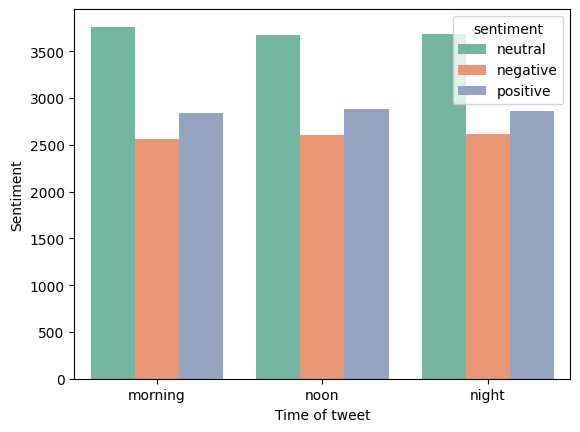

In [ ]:
import seaborn as sns
sns.countplot(data=trainData,x='Time of Tweet',hue='sentiment', palette='Set2')
plt.xlabel("Time of tweet")
plt.ylabel("Sentiment")

As you can see, there is no correlation between time of tweets and sentiment. People tend to have equal amount of neutral, positive and negative comments in all times of the day.

# **Task 4**

The main aim of this task is to use LDA (Latent Dirichlet Allocation) to discover hidden topics within the tweet dataset and analyze how these topics correlate with different sentiment classes (positive, neutral, negative). Apply LDA to the text or selected_text field to identify the most common topics discussed in the tweets. After extracting the topics, categorize tweets based on the most likely topic and analyze the distribution of sentiment across different topics. Visualize the topics using word clouds or bar charts to interpret the most frequent words associated with each topic.

In [ ]:
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
import contractions

In [ ]:
trainData = trainData.dropna()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mahya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
stop_words = set(stopwords.words('english'))
chatWords = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}


In [ ]:
# Abbreviation dictionary
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
def fix_contractions(word):
    return contractions.fix(word)

In [ ]:
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations else word

In [ ]:
def chat_conversion(text):
    words = text.split()
    expanded_words = []
    for word in words:
        if word.upper() in chatWords:
            expanded_words.append(chatWords[word.upper()])
        else:
            expanded_words.append(word)
    return ' '.join(expanded_words)


In [ ]:
def preprocess_text(text):
    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#', '', text)

    # Remove non-alphabetical characters and convert to lowercase
    text = re.sub(r'[^A-Za-z\s]', '', text).lower()

    # Expand chat words
    words = text.split()
    words = [chat_conversion(word) for word in words]

    # Fix contractions
    expanded_words = [fix_contractions(word) for word in words]

    # Convert abbreviations
    expanded_words = [convert_abbrev(word) for word in expanded_words]

    expanded_words = [word.lower() for word in expanded_words]

    # Tokenize and remove stopwords
    tokens = word_tokenize(' '.join(expanded_words))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return lemmatized_tokens  # Return the list of lemmatized tokens


In [ ]:
def full_preprocessing(text):
    lemmatized_tokens = preprocess_text(text)

    corrected_text = str(TextBlob(' '.join(lemmatized_tokens)).correct())

    return corrected_text, lemmatized_tokens

In [ ]:
trainData['cleaned_text'], trainData['tokens'] = zip(*trainData['text'].apply(full_preprocessing))

print(trainData[['text', 'cleaned_text', 'tokens']].head())

                                                text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                           cleaned_text  \
0                       responded going   
1               soon sad miss san diego   
2                          boy building   
3                 interview leave alone   
4  son could put release already bought   

                                        tokens  
0                           [responded, going]  
1                [sooo, sad, miss, san, diego]  
2                              [bos, bullying]  
3                    [interview, leave, alone]  
4  [son, could, put, release, already, bought]  


In [ ]:
trainData.to_csv('finalDataset.csv', index=False)

In [ ]:
import ast

newtrainData = pd.read_csv('finalDataset.csv', encoding='ISO-8859-1')  # file encoding is not UTF-8

newtrainData['tokens'] = newtrainData['tokens'].apply(ast.literal_eval)

dictionary = corpora.Dictionary(newtrainData['tokens'])
corpus = [dictionary.doc2bow(text) for text in newtrainData['tokens']]

lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# print the top 8 words for each of the 10 topics
topics = lda_model.print_topics(num_words=8)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")


Topic 0: 0.057*"laughing" + 0.056*"loud" + 0.017*"sure" + 0.012*"get" + 0.010*"game" + 0.010*"stupid" + 0.009*"got" + 0.009*"think"
Topic 1: 0.033*"miss" + 0.032*"good" + 0.027*"morning" + 0.025*"week" + 0.018*"see" + 0.017*"going" + 0.015*"hey" + 0.015*"nice"
Topic 2: 0.023*"hate" + 0.021*"school" + 0.017*"yes" + 0.016*"really" + 0.014*"make" + 0.012*"going" + 0.012*"nothing" + 0.011*"poor"
Topic 3: 0.027*"watching" + 0.024*"working" + 0.021*"may" + 0.020*"song" + 0.015*"rain" + 0.015*"trying" + 0.013*"twitter" + 0.012*"exam"
Topic 4: 0.034*"thanks" + 0.032*"feel" + 0.032*"night" + 0.025*"sorry" + 0.025*"last" + 0.022*"like" + 0.022*"better" + 0.021*"bad"
Topic 5: 0.039*"wish" + 0.036*"could" + 0.026*"would" + 0.021*"know" + 0.019*"want" + 0.018*"done" + 0.017*"cool" + 0.016*"already"
Topic 6: 0.027*"new" + 0.018*"sad" + 0.018*"friend" + 0.016*"best" + 0.015*"thank" + 0.012*"old" + 0.012*"please" + 0.012*"good"
Topic 7: 0.147*"day" + 0.060*"happy" + 0.049*"mother" + 0.025*"mom" + 0.01

In [ ]:
# Assign the most likely topic to each tweet
def get_most_likely_topic(lda_model, bow):
    topic_probs = lda_model.get_document_topics(bow)
    return max(topic_probs, key=lambda x: x[1])[0]

newtrainData['topic'] = newtrainData['tokens'].apply(lambda text: get_most_likely_topic(lda_model, dictionary.doc2bow(text)))


In [ ]:
sorted_data = newtrainData.sort_values(by='topic', ascending=True)
sorted_data

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (KmÂ²),Density (P/KmÂ²),cleaned_text,tokens,topic
18482,ebc72bfcb5,Has had a really good bank hoilday,good bank hoilday,positive,morning,46-60,Rwanda,12952218,24670.0,525,really good bank holiday,"[really, good, bank, hoilday]",0
16685,6e57a8403b,Had lunch. Watching holes on bbc1.,Had lunch. Watching holes on bbc1.,neutral,morning,0-20,Solomon Islands,686884,28000.0,25,lunch watching hole british broadcasting corpo...,"[lunch, watching, hole, british, broadcasting,...",0
20412,f98930b9f0,Miss the newest version on Glade on Debian..,Miss the newest version on Glade on Debian..,negative,noon,21-30,Zambia,18383955,743390.0,25,miss newest version glade median,"[miss, newest, version, glade, debian]",0
15526,8ad203fa42,Bubbletweet hates me,hates,negative,night,70-100,Madagascar,27691018,581795.0,48,bubbletweet hate,"[bubbletweet, hate]",0
4913,6cf2ac4ce2,CAKE is sold out at terminal 5,CAKE is sold out at terminal 5,neutral,morning,0-20,Egypt,102334404,995450.0,103,cake sold terminal,"[cake, sold, terminal]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20377,7418edf469,"Just FYI, there is also turkish star wars rip ...",rip off,negative,night,31-45,Slovenia,2078938,20140.0,103,information also turkish star war rip,"[information, also, turkish, star, war, rip]",9
24677,b10bbcb16a,Happy Mother`s Day to all the mamas out there,Happy Mother`s Day,positive,morning,0-20,Eritrea,3546421,101000.0,35,happy mother day mamma,"[happy, mother, day, mama]",9
11936,a09faf93f5,just made my day: http://tinyurl.com/cumqmv,just made my day:,positive,morning,46-60,Indonesia,273523615,1811570.0,151,made day,"[made, day]",9
20394,88048c4a8c,join the club dougie i have a cold too x,cold,negative,noon,21-30,Togo,8278724,54390.0,152,join club double cold,"[join, club, dougie, cold]",9


In [ ]:
sentiment_time = newtrainData.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_time.div(sentiment_time.sum(axis=1), axis=0) * 100
sentiment_percentages

sentiment,negative,neutral,positive
topic,,,
0,25.280000,50.560000,24.160000
1,31.464666,41.058034,27.477300
2,40.024555,40.300798,19.674647
3,25.819071,41.760391,32.420538
4,26.162928,32.798111,41.038961
5,30.515971,49.090909,20.393120
6,31.026528,42.964245,26.009227
7,27.739938,45.820433,26.439628
8,23.288749,40.086546,36.624705


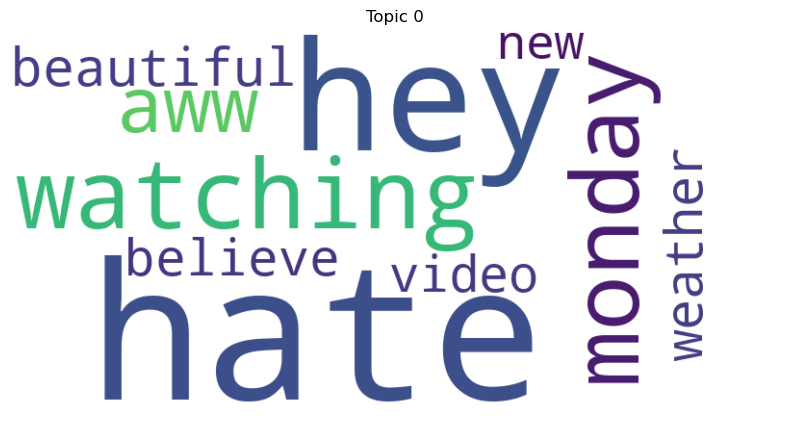

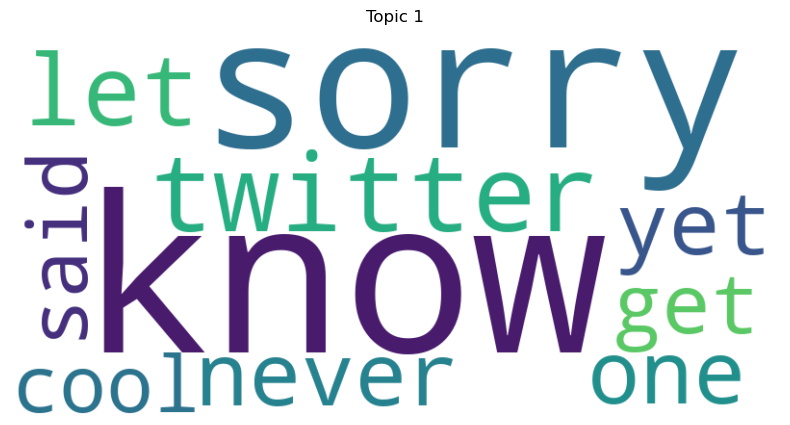

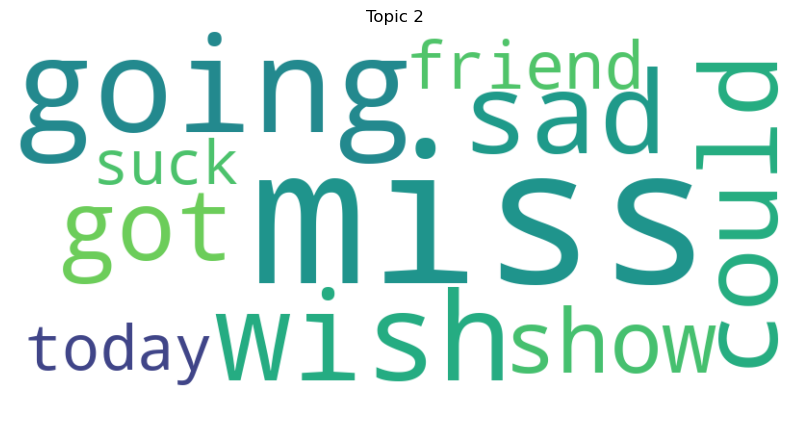

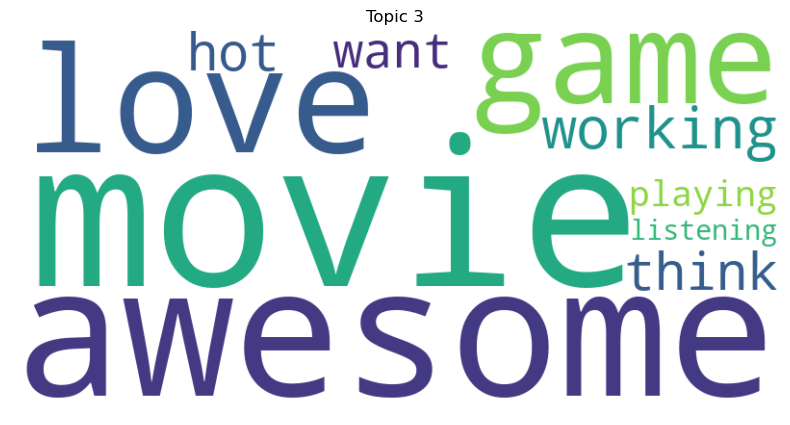

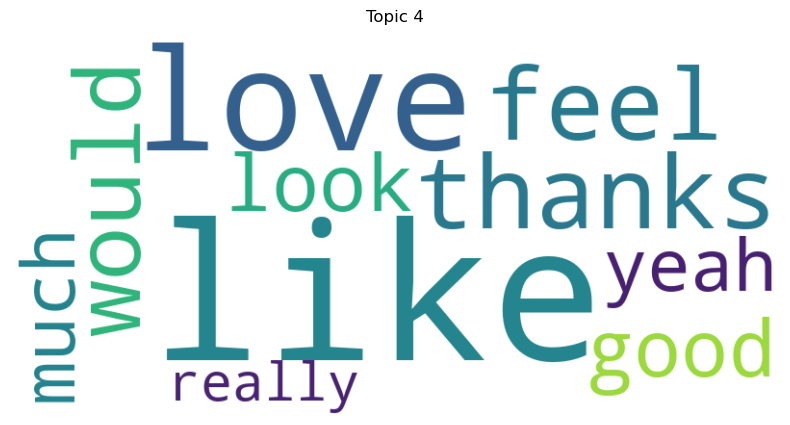

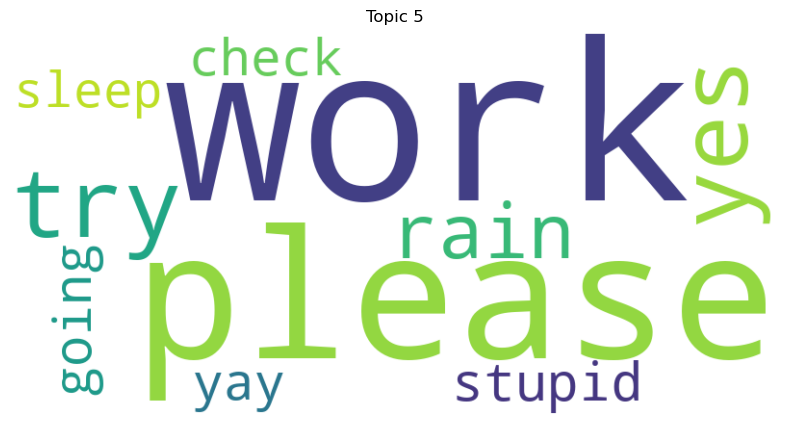

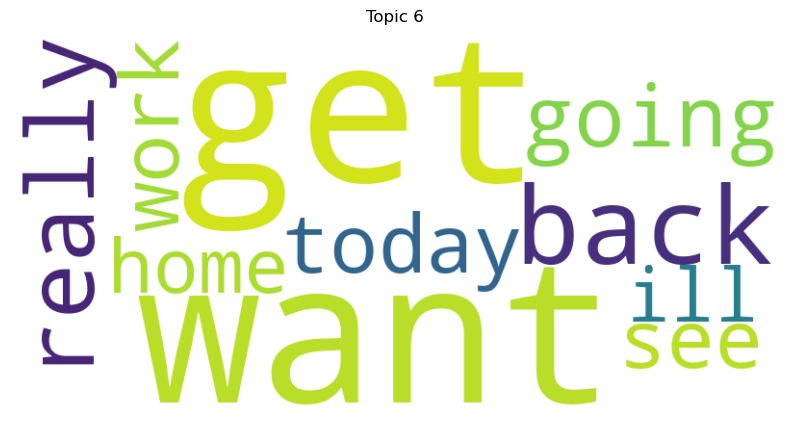

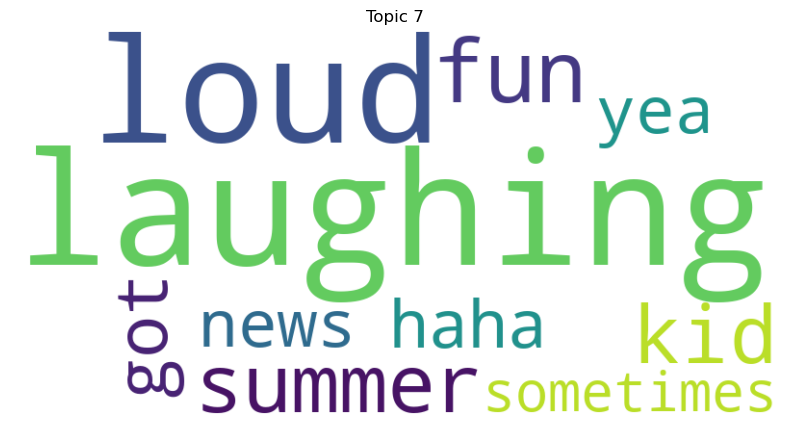

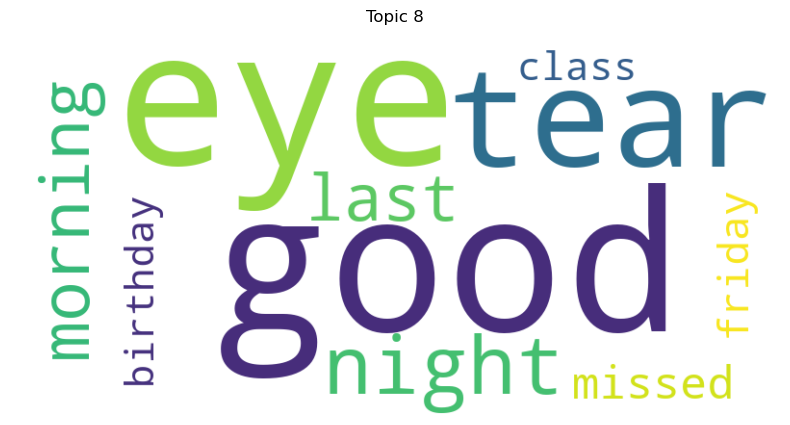

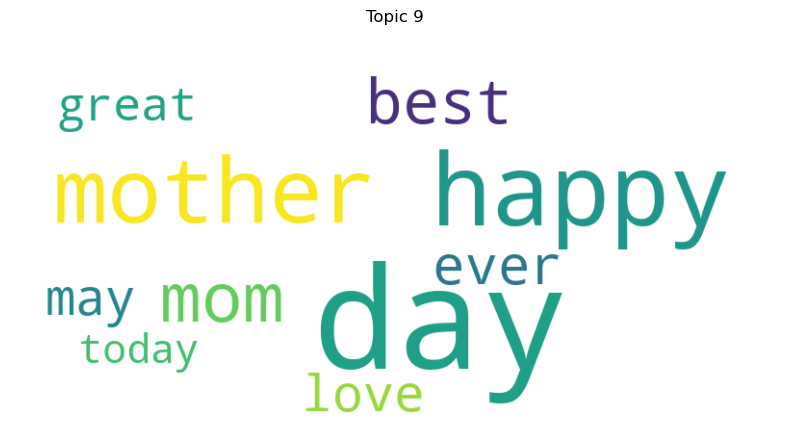

In [ ]:
from wordcloud import WordCloud

def create_word_cloud(lda_model, topic_id):
    # Get the words and their probabilities for the given topic
    topic_words = lda_model.show_topic(topic_id, topn=10)
    words = dict(topic_words)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id}')
    plt.show()

for i in range(10):  # the number of topics
    create_word_cloud(lda_model, i)

# **Task 5**

The purpose of the task is to optimize LDA’s performance by tuning the number of topics based on topic coherence. Experiment with different numbers of topics for LDA (e.g., 5, 10, 15, 20) and use a coherence score (e.g., CV coherence) to evaluate the quality of the topics. Fine-tune the number of topics based on coherence score to identify the most meaningful number of topics for the dataset.

In [ ]:
# Evaluate LDA model
def coherence_measurement(num_of_topics):
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=newtrainData['tokens'], dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"Coherence score with {num_of_topics} topics: {coherence_lda}")

In [ ]:
coherence_measurement(10)

Coherence score with 10 topics: 0.3271963408908693


In [ ]:
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# print the top 8 words for each of the 10 topics
topics = lda_model.print_topics(num_words=8)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

coherence_measurement(3)

Topic 0: 0.017*"eye" + 0.017*"want" + 0.016*"tear" + 0.011*"miss" + 0.008*"get" + 0.008*"going" + 0.007*"work" + 0.006*"back"
Topic 1: 0.047*"day" + 0.022*"good" + 0.019*"happy" + 0.015*"mother" + 0.013*"night" + 0.011*"wish" + 0.011*"morning" + 0.010*"love"
Topic 2: 0.013*"today" + 0.013*"like" + 0.012*"get" + 0.011*"laughing" + 0.011*"loud" + 0.010*"got" + 0.010*"know" + 0.009*"going"
Coherence score with 3 topics: 0.30834824673584443


In [ ]:
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# print the top 8 words for each of the 10 topics
topics = lda_model.print_topics(num_words=8)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

coherence_measurement(5)

Topic 0: 0.026*"laughing" + 0.025*"loud" + 0.017*"thanks" + 0.013*"know" + 0.012*"would" + 0.009*"see" + 0.009*"one" + 0.009*"like"
Topic 1: 0.038*"day" + 0.017*"work" + 0.017*"eye" + 0.016*"good" + 0.016*"tear" + 0.015*"going" + 0.015*"happy" + 0.014*"get"
Topic 2: 0.017*"love" + 0.009*"new" + 0.009*"wish" + 0.007*"hate" + 0.007*"song" + 0.006*"movie" + 0.006*"guy" + 0.006*"could"
Topic 3: 0.011*"thank" + 0.009*"may" + 0.008*"watching" + 0.007*"good" + 0.007*"looking" + 0.007*"star" + 0.006*"coffee" + 0.005*"new"
Topic 4: 0.025*"like" + 0.014*"feel" + 0.011*"right" + 0.011*"get" + 0.010*"look" + 0.010*"got" + 0.009*"really" + 0.009*"sorry"
Coherence score with 5 topics: 0.32166510503626


In [ ]:
lda_model = gensim.models.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=15)

# print the top 8 words for each of the 10 topics
topics = lda_model.print_topics(num_words=8)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

coherence_measurement(20)

Topic 0: 0.076*"see" + 0.070*"today" + 0.049*"going" + 0.045*"come" + 0.039*"fun" + 0.036*"tomorrow" + 0.033*"guy" + 0.031*"show"
Topic 1: 0.120*"good" + 0.047*"better" + 0.037*"though" + 0.037*"hope" + 0.035*"even" + 0.023*"get" + 0.023*"call" + 0.019*"late"
Topic 2: 0.090*"night" + 0.071*"last" + 0.037*"bed" + 0.027*"everyone" + 0.027*"friday" + 0.026*"good" + 0.021*"going" + 0.021*"looking"
Topic 3: 0.138*"one" + 0.041*"movie" + 0.034*"life" + 0.032*"thought" + 0.031*"song" + 0.028*"watch" + 0.022*"play" + 0.020*"yesterday"
Topic 4: 0.076*"miss" + 0.071*"thanks" + 0.048*"morning" + 0.038*"school" + 0.037*"friend" + 0.033*"sure" + 0.031*"good" + 0.025*"great"
Topic 5: 0.080*"would" + 0.059*"thing" + 0.040*"best" + 0.038*"never" + 0.032*"lot" + 0.031*"people" + 0.026*"job" + 0.025*"ever"
Topic 6: 0.057*"getting" + 0.038*"man" + 0.036*"cool" + 0.034*"made" + 0.032*"ready" + 0.028*"also" + 0.027*"wow" + 0.025*"glad"
Topic 7: 0.260*"day" + 0.105*"happy" + 0.086*"mother" + 0.044*"mom" + 0

# **Task 6**

The aim of this task is to use Word2Vec or BERT-based embeddings to analyze the similarity between different topics extracted via LDA (Task 4). Generate word embeddings for the most frequent words in each LDA topic using Word2Vec or BERT. Calculate the cosine similarity between different topics based on their word embeddings to see which topics are semantically similar. Visualize the similarity between topics using heatmaps or dendrograms.

In [ ]:
from gensim.models import Word2Vec
import numpy as np

w2v_model = Word2Vec(sentences=newtrainData['tokens'], vector_size=100, window=5, min_count=1, workers=4)

topic_words = {}
for idx in range(10):
    words = lda_model.get_topic_terms(idx, topn=10)  # Get top 10 words for each topic
    topic_words[idx] = [dictionary[word[0]] for word in words]  # Get the actual words

topic_embeddings = {}
for topic_idx, words in topic_words.items():
    embeddings = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    topic_embeddings[topic_idx] = sum(embeddings) / len(embeddings) if embeddings else np.zeros(w2v_model.vector_size)  # Average of embeddings

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix_w2v = cosine_similarity(np.array(list(topic_embeddings.values())))

print("Word2Vec Cosine Similarity Matrix:")
print(similarity_matrix_w2v)

Word2Vec Cosine Similarity Matrix:
[[1.         0.97558486 0.98917586 0.98789203 0.9816044  0.9896822
  0.9829165  0.9001522  0.9511685  0.99405515]
 [0.97558486 1.0000001  0.9940629  0.9955334  0.9987813  0.98967564
  0.9955508  0.95200276 0.98636466 0.9855464 ]
 [0.98917586 0.9940629  1.         0.99801874 0.9967227  0.99869114
  0.9938996  0.9221819  0.9775983  0.9967814 ]
 [0.98789203 0.9955334  0.99801874 0.9999997  0.9966925  0.9973091
  0.9986619  0.94151175 0.9718537  0.99631673]
 [0.9816044  0.9987813  0.9967227  0.9966925  0.99999994 0.9930635
  0.9954317  0.941801   0.9845959  0.990152  ]
 [0.9896822  0.98967564 0.99869114 0.9973091  0.9930635  1.
  0.99314797 0.91711605 0.9680625  0.9986502 ]
 [0.9829165  0.9955508  0.9938996  0.9986619  0.9954317  0.99314797
  1.0000001  0.9564353  0.9678324  0.99223566]
 [0.9001522  0.95200276 0.9221819  0.94151175 0.941801   0.91711605
  0.9564353  1.         0.9137829  0.9143502 ]
 [0.9511685  0.98636466 0.9775983  0.9718537  0.9845959 

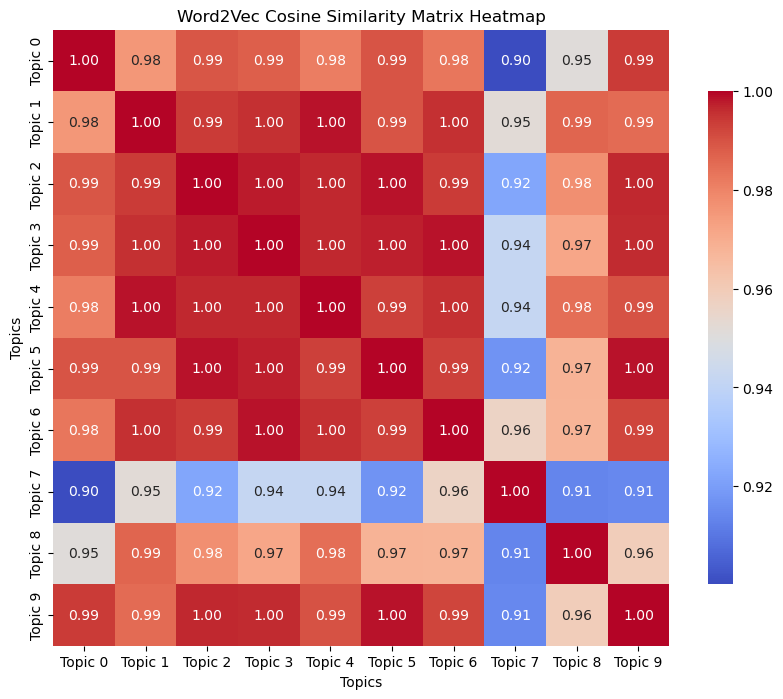

In [ ]:
import seaborn as sns

topic_labels = [f'Topic {i}' for i in range(similarity_matrix_w2v.shape[0])]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix_w2v,
            annot=True,  # Show values in each cell
            fmt=".2f",  # Formatting for the annotation
            cmap='coolwarm',  # Color map for the heatmap
            xticklabels=topic_labels,  # Set x-axis labels
            yticklabels=topic_labels,  # Set y-axis labels
            square=True,  # Square cells
            cbar_kws={"shrink": .8})  # Shrink color bar

# Add title and labels
plt.title('Word2Vec Cosine Similarity Matrix Heatmap')
plt.xlabel('Topics')
plt.ylabel('Topics')

# Show the heatmap
plt.show()


# **Task 7**

In this task we want to combine transformer-generated
embeddings (e.g., BERT embeddings) with LDA to improve topic extraction and sentiment analysis. Generate sentence
embeddings for each tweet using a transformer model like BERT. Use these embeddings as input for an LDA variant that
works with dense vectors (e.g., BERTopic). Analyze the resulting topics and their sentiment evolution, paying close attention
to how transformer embeddings impact the quality and coherence of topics.

In [12]:
newtrainData = pd.read_csv('finalDataset.csv', encoding='ISO-8859-1')

In [13]:
newtrainData = newtrainData.dropna(subset=['cleaned_text', 'sentiment'])

In [14]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()  # Get mean of the last hidden states

newtrainData['cleaned_text'] = newtrainData['cleaned_text'].astype(str)
# Generate embeddings for all tweets
newtrainData['embeddings'] = newtrainData['cleaned_text'].apply(get_bert_embeddings)


In [17]:
newtrainData['embeddings']

0        [0.0098835975, -0.36287054, -0.10699862, 0.067...
1        [-0.16926005, -0.19927049, 0.45561177, -0.0350...
2        [0.36643267, 0.35659367, 0.0019995645, 0.04695...
3        [0.18650743, -0.31773743, 0.0037898242, 0.2026...
4        [0.062484846, -0.22324596, 0.4231843, 0.037087...
                               ...                        
27475    [-0.0066106915, -0.23103733, 0.8060536, -0.007...
27476    [-0.068248436, -0.2741171, 0.4903814, 0.035694...
27477    [0.29165626, -0.0815161, 0.7660913, 0.06177547...
27478    [0.13251048, -0.18922365, -0.13479312, 0.01639...
27479    [-0.031854153, -0.14618252, 0.14486608, 0.0161...
Name: embeddings, Length: 27368, dtype: object

In [21]:
import numpy as np
from bertopic import BERTopic
import hdbscan

embeddings_array = np.vstack(newtrainData['embeddings'].values)

topic_model = BERTopic(hdbscan_model=hdbscan.HDBSCAN(min_cluster_size=40))  
topics, probabilities = topic_model.fit_transform(documents=newtrainData['cleaned_text'].tolist(), embeddings=embeddings_array)

newtrainData['bert_topics'] = topics

In [22]:
newtrainData['bert_topics'].value_counts()

bert_topics
 0    26299
 1      635
-1      273
 2       65
 3       53
 4       43
Name: count, dtype: int64

In [23]:
topic_model.visualize_topics()
topic_model.visualize_barchart(top_n_topics=newtrainData['bert_topics'].unique().size)

In [47]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

tokenized_texts = [text.split() for text in newtrainData['cleaned_text']]
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

topics = topic_model.get_topics()
topics = {k: v for k, v in topics.items() if k != -1}
topics_words = [[word[0] for word in topic] for topic in topics.values()]

coherence_model = CoherenceModel(topics=topics_words, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')

coherence_score = coherence_model.get_coherence()
print(f"Topic Coherence Score: {coherence_score}")

Topic Coherence Score: 0.4695789294884631


In [48]:
coherence_scores = coherence_model.get_coherence_per_topic()

for topic_id, score in enumerate(coherence_scores):
    print(f"Topic {topic_id}: Coherence Score = {score:.4f}")

Topic 0: Coherence Score = 0.3570
Topic 1: Coherence Score = 0.6371
Topic 2: Coherence Score = 0.6475
Topic 3: Coherence Score = 0.3758
Topic 4: Coherence Score = 0.3305


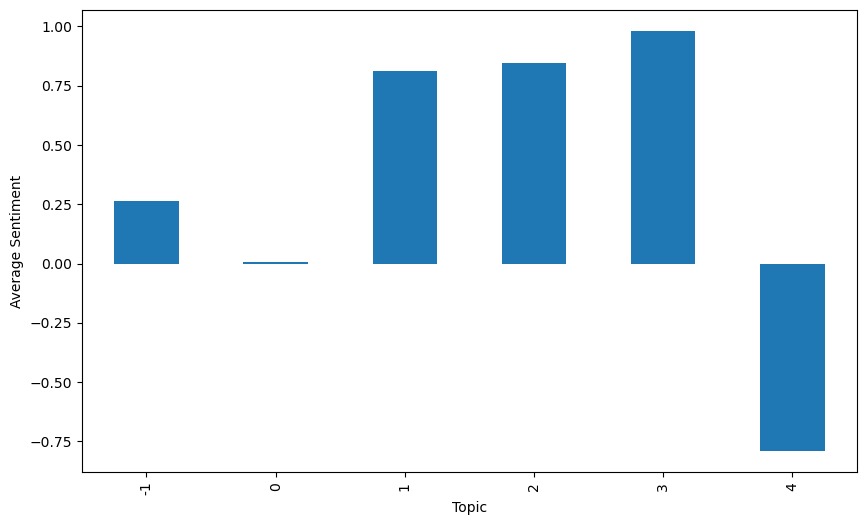

In [49]:
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
newtrainData['sentiment_num'] = newtrainData['sentiment'].map(sentiment_mapping)

topic_sentiment = newtrainData.groupby('bert_topics')['sentiment_num'].mean()

plt.figure(figsize=(10, 6))
topic_sentiment.plot(kind='bar')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment')
plt.show()